# Adveriting and Sales Data (LinearRegression)
This data is about the relation between Sales and Marketing at different Media ( TVs , Radio and Social Media ).

*Here* we will make a linear Regressor and Correlation to show the relation between Data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('../input/advertising-and-sales/advertising_and_sales_clean.csv')
df.head(20)

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18
5,29000.0,9614.38,1027.16,Mega,105889.15
6,55000.0,24893.81,4273.60,Micro,198679.82
7,31000.0,17355.04,2289.85,Nano,108733.93
8,76000.0,24648.90,7130.12,Macro,270189.40
9,13000.0,431.13,2229.42,Mega,48280.58


## EDA

In [3]:
df.describe()

,tv,radio,social_media,sales
count,4546.000000,4546.000000,4546.000000,4546.000000
mean,54062.912451,18157.533110,3323.472829,192413.332112
std,26104.941838,9663.259642,2211.253915,93019.873216
min,10000.000000,0.680000,0.030000,31199.410000
25%,32000.000000,10555.355000,1530.822500,112434.610000
50%,53000.000000,17859.515000,3055.565000,188963.680000
75%,77000.000000,25640.605000,4804.922500,272324.240000
max,100000.000000,48871.160000,13981.660000,364079.750000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tv            4546 non-null   float64
 1   radio         4546 non-null   float64
 2   social_media  4546 non-null   float64
 3   influencer    4546 non-null   object 
 4   sales         4546 non-null   float64
dtypes: float64(4), object(1)
memory usage: 177.7+ KB


In [5]:
groupping=df.groupby('influencer').count()
print(groupping)

              tv  radio  social_media  sales
influencer                                  
Macro       1112   1112          1112   1112
Mega        1152   1152          1152   1152
Micro       1148   1148          1148   1148
Nano        1134   1134          1134   1134


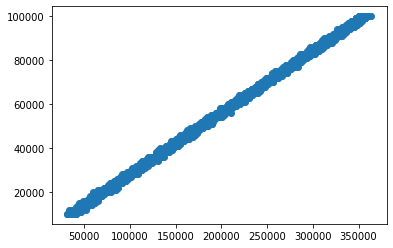

In [6]:
plt.scatter(df['sales'],df['tv'])

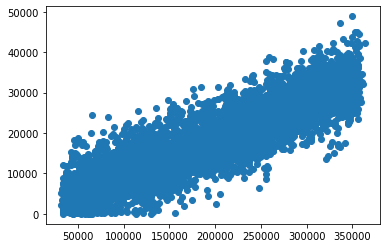

In [7]:
plt.scatter(df['sales'],df['radio'] )

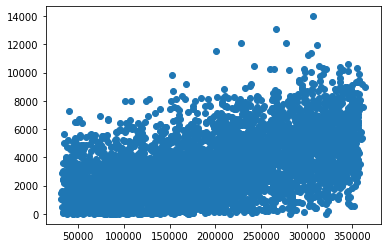

In [8]:
plt.scatter(df['sales'] , df['social_media'])

# Linear Regression 

In [9]:
X = df.drop('sales',axis=1).values
y = df['sales'].values
print(type(X),type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [10]:
X_sm = X[:,2]
print(X_sm.shape,y.shape)

(4546,) (4546,)


In [11]:
X_sm= X_sm.reshape(-1,1)
print(X_sm.shape)

(4546, 1)


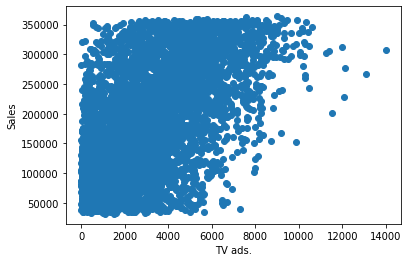

In [12]:
plt.scatter(X_sm,y)
plt.xlabel("TV ads.")
plt.ylabel("Sales")
plt.show()

### Fitteing a regression model

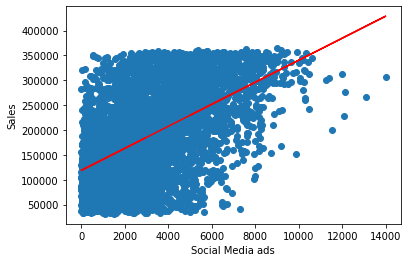

In [13]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_sm,y)
predictions = lreg.predict(X_sm)
plt.scatter(X_sm,y)
plt.plot(X_sm,predictions,color = 'r')
plt.xlabel("Social Media ads")
plt.ylabel("Sales")
plt.show()

Correlation factor for pearsonr , spearmanr and kendalltau

In [14]:
import scipy.stats
X_sm = X_sm.reshape(4546,)
(corr_pear_fitted , p_value_pear_fitted) = scipy.stats.pearsonr(X_sm,predictions)
(corr_spear_fitted ,p_value_spear_fitted) = scipy.stats.spearmanr(X_sm,predictions)
(corr_kendal_fitted ,p_value_kendal_fitted) = scipy.stats.kendalltau(X_sm,predictions)

In [15]:
print('Correlation of pearson social media with the fitted data : {}'.format(corr_pear_fitted))
print('correlation of spearman social media with the fitted data : {}'.format(corr_spear_fitted))
print('correlation of kendall social media with the fitted data : {}'.format(corr_kendal_fitted))

Correlation of pearson social media with the fitted data : 0.9999999999999999
correlation of spearman social media with the fitted data : 1.0
correlation of kendall social media with the fitted data : 1.0


In [16]:
print('p-value for pearson social media with the fitted data : {}'.format(p_value_pear_fitted))
print('p-value for spearman social media with the fitted data : {}'.format(p_value_spear_fitted))
print('p-value for kendall social media with the fitted data : {}'.format(p_value_kendal_fitted))

p-value for pearson social media with the fitted data : 0.0
p-value for spearman social media with the fitted data : 0.0
p-value for kendall social media with the fitted data : 0.0


<AxesSubplot:>

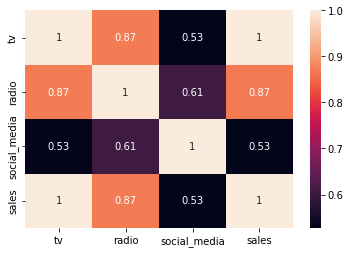

In [17]:
import seaborn as sns
sns.heatmap(df.corr(),annot =True)

In [18]:
X_tv = X[:,0]
X_rad = X[:,1]

In [19]:
(corr_pear_tv,p_value_tv)=scipy.stats.pearsonr(X_sm,X_tv)
(corr_spear_tv,p_value_tv) = scipy.stats.spearmanr(X_sm,X_tv)
(corr_kendal_tv,p_value_tv) = scipy.stats.kendalltau(X_sm,X_tv)

In [20]:
print('pearson correlation between social media and tv : {}'.format(corr_pear_tv))
print('spearman correlation between social media and tv : {}'.format(corr_spear_tv))
print('Kendall tau correlation between social media and tv : {}'.format(corr_kendal_tv))

pearson correlation between social media and tv : 0.5276874293131321
spearman correlation between social media and tv : 0.5283872233222907
Kendall tau correlation between social media and tv : 0.3644053913094565


**Note** : It seems that kendall tau correlation is far from the correlation we got from heat map 

## Now we will make colleration between sales with TVs , Radio , Social Media 

In [21]:
(corr_pear_sales_tv,p_value_sales_tv)=scipy.stats.pearsonr(y,X_tv)
(corr_spear_sales_tv,p_value_sales_tv) = scipy.stats.spearmanr(y,X_tv)
(corr_kendal_sales_tv,p_value_sales_tv) = scipy.stats.kendalltau(y,X_tv)
print('pearson correlation between Sales and tv : {}'.format(corr_pear_sales_tv))
print('spearman correlation between Sales and tv : {}'.format(corr_spear_sales_tv))
print('Kendall tau correlation between Sales and tv : {}'.format(corr_kendal_sales_tv))

pearson correlation between Sales and tv : 0.999497365941497
spearman correlation between Sales and tv : 0.9994958189860506
Kendall tau correlation between Sales and tv : 0.9837033941521164


In [22]:
(corr_pear_sales_radio,p_value_sales_radio)=scipy.stats.pearsonr(y,X_rad)
(corr_spear_sales_radio,p_value_sales_radio) = scipy.stats.spearmanr(y,X_rad)
(corr_kendal_sales_radio,p_value_sales_radio) = scipy.stats.kendalltau(y,X_rad)
print('pearson correlation between Sales and Radio : {}'.format(corr_pear_sales_radio))
print('spearman correlation between Sales and Radio : {}'.format(corr_spear_sales_radio))
print('Kendall tau correlation between Sales and Radio : {}'.format(corr_kendal_sales_radio))

pearson correlation between Sales and Radio : 0.868637813602153
spearman correlation between Sales and Radio : 0.8733903567887087
Kendall tau correlation between Sales and Radio : 0.6776141094422263


In [23]:
(corr_pear_sales_sm,p_value_sales_sm)=scipy.stats.pearsonr(y,X_sm)
(corr_spear_sales_sm,p_value_sales_sm) = scipy.stats.spearmanr(y,X_sm)
(corr_kendal_sales_sm,p_value_sales_sm) = scipy.stats.kendalltau(y,X_sm)
print('pearson correlation between Sales and Social media : {}'.format(corr_pear_sales_sm))
print('spearman correlation between Sales and Social media : {}'.format(corr_spear_sales_sm))
print('Kendall tau correlation between Sales and Social media : {}'.format(corr_kendal_sales_sm))

pearson correlation between Sales and Social media : 0.52744642201645
spearman correlation between Sales and Social media : 0.5280717993064484
Kendall tau correlation between Sales and Social media : 0.362235465820529
